In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random

In [2]:
Train = pd.read_csv("Train.csv")
Test = pd.read_csv("Test.csv")

In [3]:
le = LabelEncoder()

train_X = Train.drop(columns=['Char_ID'])
train_y = le.fit_transform(Train['Char_ID'])

test_X = Test.drop(columns=['Char_ID'])
test_y = le.fit_transform(Test['Char_ID'])

In [4]:
train_X = np.array(train_X) / 255.0
train_y = np.array(train_y)

test_X = np.array(test_X) / 255.0
test_y = np.array(test_y)

In [5]:
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.15)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024,)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(46)
])

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_X, train_y, epochs=20, validation_data=(test_X, test_y))

Epoch 1/20
2078/2078 [==============================] - 8s 3ms/step - loss: 0.8592 - accuracy: 0.7545 - val_loss: 0.4416 - val_accuracy: 0.8692
Epoch 2/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.3327 - accuracy: 0.8990 - val_loss: 0.3211 - val_accuracy: 0.9054
Epoch 3/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.2357 - accuracy: 0.9282 - val_loss: 0.3065 - val_accuracy: 0.9139
Epoch 4/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.1866 - accuracy: 0.9428 - val_loss: 0.2800 - val_accuracy: 0.9212
Epoch 5/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.1490 - accuracy: 0.9551 - val_loss: 0.2986 - val_accuracy: 0.9184
Epoch 6/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.1322 - accuracy: 0.9595 - val_loss: 0.3024 - val_accuracy: 0.9262
Epoch 7/20
2078/2078 [==============================] - 7s 3ms/step - loss: 0.1208 - accuracy: 0.9638 - val_loss: 0.2772 - val_accuracy:

432/432 - 1s - loss: 0.3498 - accuracy: 0.9395
Accuracy : 93.95 %


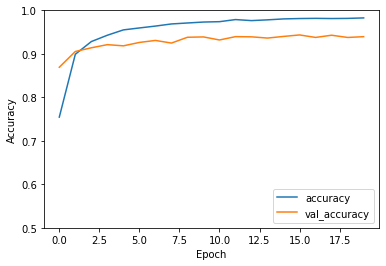

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print(f'Accuracy : {"%0.2f" % (100*test_acc)} %')

In [10]:
class_names = ['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण',
               'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष',
               'स', 'ह', 'क्ष', 'त्र', 'ज्ञ', '०', '१', '२', '३', '४', '५' , '६', '७', '८', '९']

In [11]:
font_path = "D:\Gotu\Gotu-Regular.ttf"
prop = mfm.FontProperties(fname=font_path)

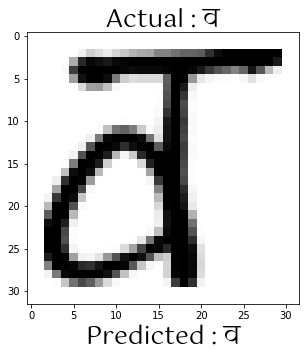

In [18]:
t = random.randint(0, len(val_X))

image = val_X[t]
label = val_y[t]

p = model.predict(np.array([image]))

temp = image.reshape((32, 32))
plt.figure(figsize=(5, 5))
plt.title(f'Actual : {class_names[val_y[t]]}', fontproperties=prop, size=25)
plt.xlabel(f'Predicted : {class_names[np.argmax(p)]}', fontproperties=prop, size=25)
plt.imshow(temp, cmap=plt.cm.binary)
plt.show()